<a href="https://colab.research.google.com/github/FayyazShaikh98/FayyazShaikh98/blob/main/Road_accident(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Road Accidents (EDA)**


### The objective of this project is to perform an exploratory data analysis (EDA) on a dataset of road accidents. This analysis will help to uncover patterns, trends, and insights that could be useful for improving road safety and reducing the frequency and severity of accidents. By thoroughly examining the dataset, I had aim to identify critical factors that contribute to road accidents and provide actionable insights for policymakers, traffic authorities, and the general public.
### The tools which i had used for this analysis are Pandas, Matplotlib, and Seaborn. Pandas will be employed for data manipulation and cleaning, allows to efficiently handle missing data, null-values, formating datetime, remove duplicates, and convert data types as needed.
### Matplotlib is utilized for basic plotting, enabling to create foundational visualizations like histograms, scatter plots, and bar charts. These visualizations helps to identify initial trends and patterns in the data.Seaborn, known for its aesthetically pleasing and advanced visualizations, is used to create more complex plots, such as pair plots, heatmaps, and distribution plots. These visualizations will facilitate deeper insights into the relationships between multiple variables.









### Let's Start

### Importing Libraries

In [ ]:
# Importing all the libraries >>
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-2-500c0fdd4c40>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


### Importing the Dataset

In [ ]:
# Importing data set using google drive.
from google.colab import drive
drive.mount('/content/drive')
rd_accident_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Datasets/accident.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### First view of Dataset

In [ ]:
rd_accident_df.head()

,Accident_ID,State,Date,Time,Reason,Number_of_Deaths,Number_of_Injuries,Road_Type,Weather_Conditions,Alcohol_Involved,Driver_Fatigue,Road_Conditions,Speed_Limit
0,1001,Andhra Pradesh,2021-05-01,15:30:00,Speeding,2,3,Rural,Sunny,No,No,Poor,60.0
1,1002,Karnataka,2021-05-02,18:45:00,Drunk Driving,1,4,Urban,Rainy,Yes,No,Good,40.0
2,1003,Delhi,2021-05-03,10:15:00,Poor Road Conditions,0,2,Urban,Foggy,No,No,Poor,50.0
3,1004,Maharashtra,2021-05-04,06:00:00,Driver Fatigue,3,6,Rural,Sunny,No,Yes,Good,70.0
4,1005,Uttar Pradesh,2021-05-05,21:20:00,Speeding,1,2,Rural,Sunny,No,No,Fair,80.0


In [ ]:
rd_accident_df.tail()

,Accident_ID,State,Date,Time,Reason,Number_of_Deaths,Number_of_Injuries,Road_Type,Weather_Conditions,Alcohol_Involved,Driver_Fatigue,Road_Conditions,Speed_Limit
295,1296,Odisha,2022-04-16,16:30:00,Poor road conditions,1,1,Rural,Sunny,No,Yes,Fair,70.0
296,1297,Karnataka,2022-04-17,08:50:00,Speeding,0,4,Urban,Sunny,No,No,Fair,50.0
297,1298,Andhra Pradesh,2022-04-18,03:00:00,Driver fatigue,1,2,Rural,Sunny,No,Yes,Good,40.0
298,1299,Telangana,2022-04-19,20:10:00,Speeding,3,1,Rural,Snowy,Yes,No,Poor,60.0
299,1300,Kerala,2022-04-20,11:45:00,Drunk driving,2,2,Urban,Rainy,Yes,No,Poor,70.0


In [ ]:
rd_accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Accident_ID         300 non-null    object 
 1   State               300 non-null    object 
 2   Date                300 non-null    object 
 3   Time                300 non-null    object 
 4   Reason              300 non-null    object 
 5   Number_of_Deaths    300 non-null    int64  
 6   Number_of_Injuries  300 non-null    object 
 7   Road_Type           300 non-null    object 
 8   Weather_Conditions  300 non-null    object 
 9   Alcohol_Involved    300 non-null    object 
 10  Driver_Fatigue      300 non-null    object 
 11  Road_Conditions     300 non-null    object 
 12  Speed_Limit         299 non-null    float64
dtypes: float64(1), int64(1), object(11)
memory usage: 30.6+ KB


In [ ]:
rd_accident_df.describe()

,Number_of_Deaths,Speed_Limit
count,300.000000,299.000000
mean,1.766667,56.989967
std,1.090651,13.042390
min,0.000000,30.000000
25%,1.000000,50.000000
50%,2.000000,60.000000
75%,3.000000,60.000000
max,5.000000,90.000000


In [ ]:
# .shape function to know the no of rows & columns
rd_accident_df.shape

(300, 13)

In [ ]:
# Sum of Null values
rd_accident_df.isnull().sum()

Accident_ID           0
State                 0
Date                  0
Time                  0
Reason                0
Number_of_Deaths      0
Number_of_Injuries    0
Road_Type             0
Weather_Conditions    0
Alcohol_Involved      0
Driver_Fatigue        0
Road_Conditions       0
Speed_Limit           1
dtype: int64

In [ ]:
# Duplicated values
rd_accident_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
295    False
296    False
297    False
298    False
299    False
Length: 300, dtype: bool

### Data Manipulation

In [ ]:
# Converting Date as object Format into Date Format
rd_accident_df['Date'] = pd.to_datetime(rd_accident_df['Date'],errors='coerce')
print(rd_accident_df['Date'])

0     2021-05-01
1     2021-05-02
2     2021-05-03
3     2021-05-04
4     2021-05-05
         ...    
295   2022-04-16
296   2022-04-17
297   2022-04-18
298   2022-04-19
299   2022-04-20
Name: Date, Length: 300, dtype: datetime64[ns]


In [ ]:
# Converting Time as object Foramt into Datetime Format
rd_accident_df['Time'] = pd.to_datetime(rd_accident_df['Time'], errors='coerce').dt.time


<ipython-input-12-2501870cee17>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  rd_accident_df['Time'] = pd.to_datetime(rd_accident_df['Time'], errors='coerce').dt.time


In [ ]:
rd_accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Accident_ID         300 non-null    object        
 1   State               300 non-null    object        
 2   Date                299 non-null    datetime64[ns]
 3   Time                299 non-null    object        
 4   Reason              300 non-null    object        
 5   Number_of_Deaths    300 non-null    int64         
 6   Number_of_Injuries  300 non-null    object        
 7   Road_Type           300 non-null    object        
 8   Weather_Conditions  300 non-null    object        
 9   Alcohol_Involved    300 non-null    object        
 10  Driver_Fatigue      300 non-null    object        
 11  Road_Conditions     300 non-null    object        
 12  Speed_Limit         299 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object

In [ ]:
# Finding the average speed_limit
avg_speed = rd_accident_df['Speed_Limit'].mean()
print(f'The average speed of vehicle in raod accident is: {round(avg_speed)}')

The average speed of vehicle in raod accident is: 57


In [ ]:
# Count of accident group by speed limit
accident_count = rd_accident_df.groupby(['Speed_Limit'])['Number_of_Deaths'].mean()
# Insights Found:-
# 1. The average speed of the vehicle is 56.98
# 2. the number of casualties increases when speed is < 60
print(accident_count)

Speed_Limit
30.0    1.000000
40.0    1.403846
50.0    1.678161
60.0    1.879518
70.0    2.026316
80.0    1.966667
90.0    2.000000
Name: Number_of_Deaths, dtype: float64


In [ ]:
# Average No of Deaths
avg_death = rd_accident_df['Number_of_Deaths'].mean()
print(f'The average number of death in road accident is: {round(avg_death, 2)}')

The average number of death in road accident is: 1.77


In [ ]:
# Road accident by alcohol
rd_accident_by_alcohol = rd_accident_df['Alcohol_Involved'] == 'Yes'

# rd_accident_by_alcohol.sum()

In [ ]:
deaths_by_alcohol = rd_accident_by_alcohol.value_counts()# Count of accidents caused by consuming alcohol
print(deaths_by_alcohol) # Value counts of accidents caused by consuming alcohol

Alcohol_Involved
False    200
True     100
Name: count, dtype: int64


In [ ]:
print(f'The number of accident caused by consumption of alcohol is:',rd_accident_by_alcohol.sum()) # Sum of accidents caused by consuming alcohol

The number of accident caused by consumption of alcohol is: 100


In [ ]:
# Calculating accident caused in rular and urban area
rd_accident_by_urban = rd_accident_df['Road_Type'] == 'Urban'
rd_accident_by_rural = rd_accident_df['Road_Type'] == 'Rural'
print('The sum of accidents in urban is:', rd_accident_by_urban.sum())
print('The sum of accidents in rural is:', rd_accident_by_rural.sum())

The sum of accidents in urban is: 156
The sum of accidents in rural is: 143


In [ ]:
# Value counts of accidents in urban area
rd_accident_by_urban.value_counts()

Road_Type
True     156
False    144
Name: count, dtype: int64

In [ ]:
# Value counts of accidents in rural area
rd_accident_by_rural.value_counts()

Road_Type
False    157
True     143
Name: count, dtype: int64

### Charts for Visualization, storytelling & Experimenting the Data set >>

### Chart 1: Bar Chart for Analysing Average speed of the vehicles groupby Number of Deaths
### Insights found: The Bar chart indicate that the average number of deaths tends to be higher when the speed is below 60 kmph, whereas it decreases somewhat when the speed exceeds 30 kmph.

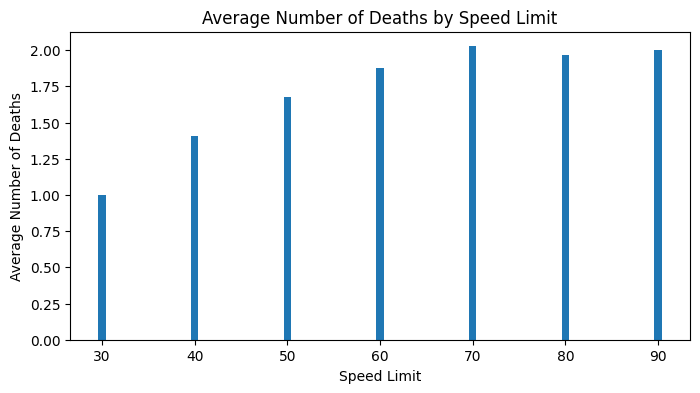

In [ ]:
avg_speed = rd_accident_df.groupby('Speed_Limit')['Number_of_Deaths'].mean()
plt.figure(figsize=(8, 4))
plt.bar(avg_speed.index, avg_speed.values)
plt.xlabel('Speed Limit')
plt.ylabel('Average Number of Deaths')
plt.title('Average Number of Deaths by Speed Limit')
plt.grid(False)
plt.show()

### Chart 2: Pie chart for analyzing the no of accidents by road type
### Insights found: The insights revealed indicate that road accidents resulting in fatalities are predominant in rural areas, accounting for 51.7% of total deaths. In contrast, urban areas contribute 47.4% to the total fatalities, while accidents occurring in foggy conditions represent a minor fraction, amounting to only 0.9%.

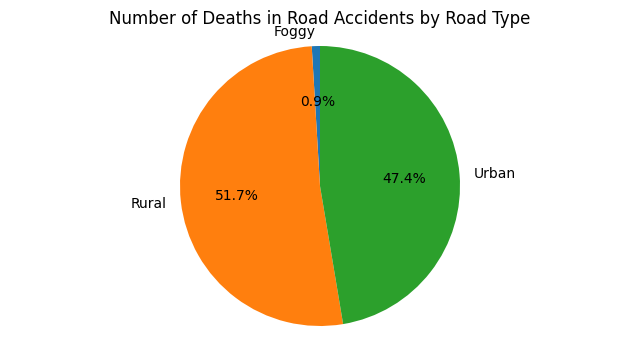

In [ ]:
# Plotting a pie chart to analyse the no of road accidents by road type ie:-(Foggy, Urban, Rural)

grouped_data = rd_accident_df.groupby('Road_Type')['Number_of_Deaths'].sum()

# Creating pie chart
plt.figure(figsize=(8, 4))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Number of Deaths in Road Accidents by Road Type')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Chart 3: Horizontal Bar Chart to identify No of Deaths by State
### Insights found: Insights from the chart highlight higher occurrences of fatalities in specific states such as Himachal Pradesh, Meghalaya, Bihar, and Goa. To mitigate these numbers, proactive steps are crucial from road transportation authorities to enhance safety measures and implement targeted interventions in these states.

<ipython-input-37-b868a5a885b4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Number_of_Deaths', y='State', data=rd_accident_df, palette='viridis')


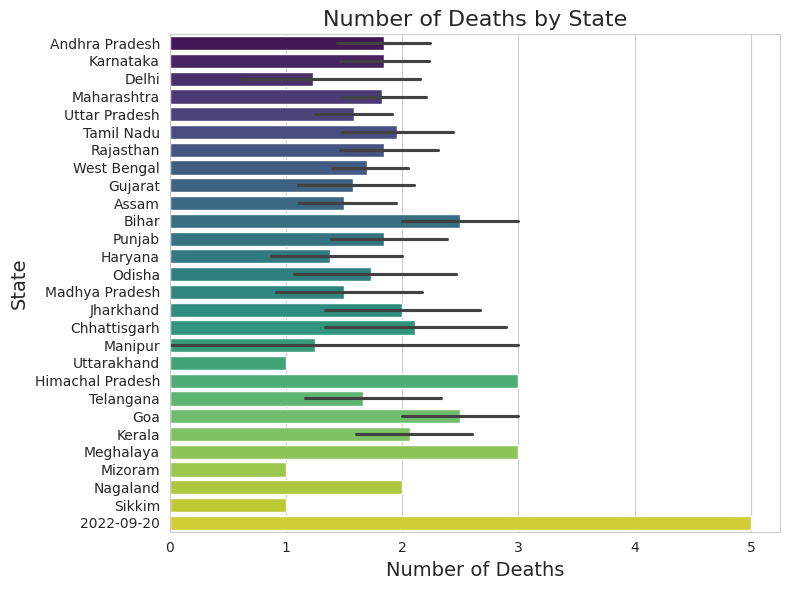

In [ ]:
# Set the style of the visualization
sns.set_style("whitegrid")

# Create the horizontal bar plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='Number_of_Deaths', y='State', data=rd_accident_df, palette='viridis')

# Adding title and labels
plt.title('Number of Deaths by State', fontsize=16)
plt.xlabel('Number of Deaths', fontsize=14)
plt.ylabel('State', fontsize=14)

# Adjusting layout for better fit
plt.tight_layout()
plt.show()

### Chart 4: Donut Chart, Analysing reasons for road Accidents
### Insights found: Donut chart below reveal significant factors contributing to road accidents: 19.7% are attributed to drunk driving, highlighting the dangers of impaired driving. Additionally, poor road conditions account for 18% of accidents, emphasizing the need for infrastructure improvements. Driver fatigue, contributing to 17.3% of accidents, underscores the importance of addressing driver health and rest regulations to enhance road safety measures comprehensively. Identifying these leading causes underscores the imperative for targeted interventions and policies aimed at reducing these risks and promoting safer roads for all.

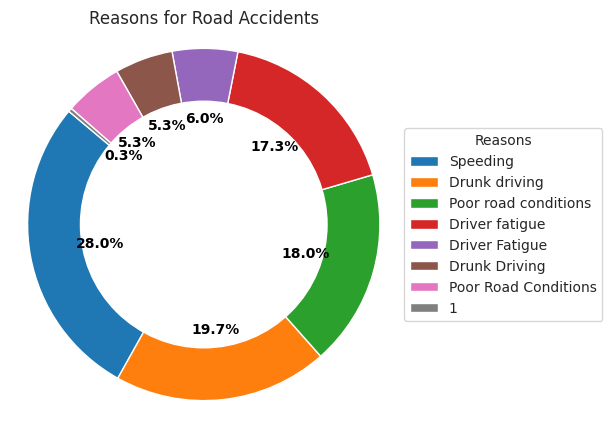

In [ ]:
# Creating Donut chart
reason_counts = rd_accident_df['Reason'].value_counts()
fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(reason_counts, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

ax.axis('equal')

# Naming title and legend
plt.title('Reasons for Road Accidents', fontsize=12)
ax.legend(wedges, reason_counts.index, title="Reasons", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# coloring
plt.setp(autotexts, size=10, weight="bold", color="black")
plt.show()

### Chart 5: Vertical Bar Chart to show Number of Injuries group by Speed Limit
### Insights found: Insights suggest that higher numbers of injuries occur within the speed range of 30 to 50 mph. This finding underscores a critical speed threshold where accident severity, potentially influenced by factors such as reaction times and collision dynamics, leads to increased injury rates on the road. Understanding these speed-related injury patterns is crucial for implementing targeted safety measures and speed management strategies aimed at reducing road accidents and their associated human toll.

<ipython-input-32-9d028eed9b97>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Speed_Limit', y='Number_of_Injuries', data=rd_accident_df, palette=colors)
<ipython-input-32-9d028eed9b97>:5: UserWarning: The palette list has more values (9) than needed (8), which may not be intended.
  bar_plot = sns.barplot(x='Speed_Limit', y='Number_of_Injuries', data=rd_accident_df, palette=colors)


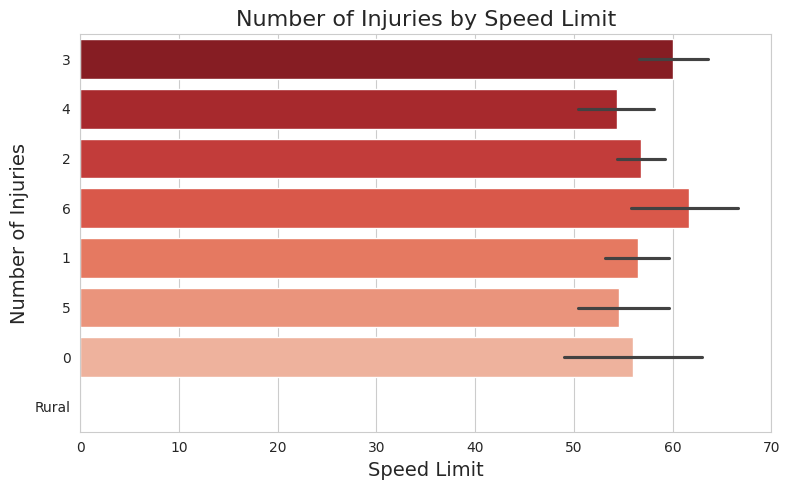

In [ ]:
# Creating Horizontal Bar chart
sns.set_style("whitegrid")
colors = sns.color_palette("Reds_r", 9)
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(x='Speed_Limit', y='Number_of_Injuries', data=rd_accident_df, palette=colors)

plt.title('Number of Injuries by Speed Limit', fontsize=16)
plt.xlabel('Speed Limit', fontsize=14)
plt.ylabel('Number of Injuries', fontsize=14)

plt.tight_layout()

plt.show()

### Conclusion :  EDA (Exploratory Data Analysis) on Road Accident Data using pandas helped me to understand road accident data comprehensively. After completing the road accident project, leveraging pandas for Exploratory Data Analysis (EDA) has proven indispensable. By utilizing pandas' robust capabilities, I navigated data structures, unearthed anomalies, and meticulously cleaned datasets, ensuring data accuracy. Visualizations crafted with Matplotlib and Seaborn uncovered critical insights, revealing seasonal accident trends and prevalent causes. These findings empowered informed decision-making, guiding the implementation of targeted safety measures and optimizing traffic management strategies.Through its comprehensive examination of accident data, pandas provided actionable intelligence to policymakers, urban planners, and law enforcement agencies, facilitating proactive measures to tackle road safety challenges and foster improvements in transportation infrastructure and policies.